<h1 style="font-size:300%; background-color:#ffe4b5; color:#4b0082; text-align:center; line-height : 60px;">
Transformaciones morfológicas sobre imágenes</h1>

<br><br>
<p style="font-size:200%; text-align:center; line-height : 40px;  margin-top : 0; margin-bottom : 0; ">Juan Camilo Santana Salgado<br></p>

<p style="font-size:180%; text-align:center; line-height : 30px;  margin-top : 0; margin-bottom : 0; "> <br><br>Ingeniería Mecatrónica</p>
<p style="font-size:180%; text-align:center; line-height : 30px; margin-top : 0; "> Facultad de Ingeniería</p>
<p style="font-size:160%; text-align:center; line-height : 30px; margin-top : 0; "> Universidad Nacional de Colombia Sede Bogotá</p>
<p style="font-size:160%; text-align:center; line-height : 30px; margin-top : 0; "> <br>2 de abril de 2021</p>

In [2]:
%matplotlib inline
import cv2
from IPython.display import Image
import numpy as np
from matplotlib import pyplot as plt
from skimage.util import random_noise as rn
from skimage import morphology as morph
from scipy import ndimage as ndi 

<h1 style="font-size:200%; text-align:center">Imagen binaria</h1>

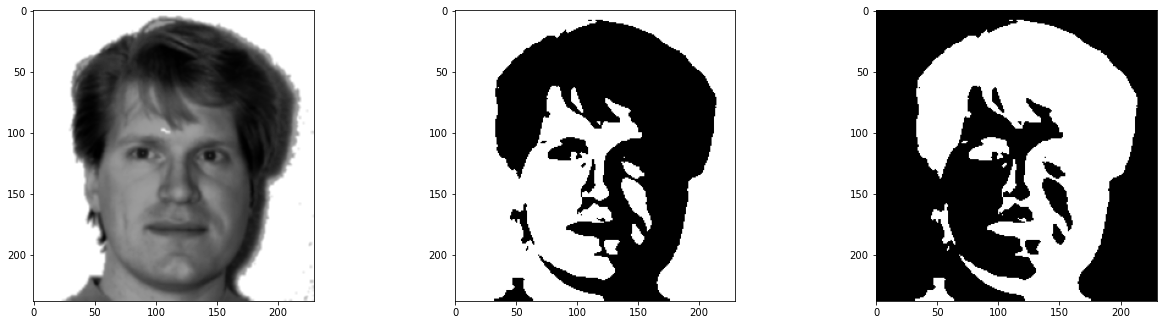

In [5]:
# Carga de imágenes
sonrisa=cv2.imread('Figs/sonrisa.png',0)
sonrisa=cv2.equalizeHist(sonrisa)

# Filtro de suavizado Gaussiano
sonrisaG=cv2.GaussianBlur(sonrisa, (3, 3), 0)

# Umbralización binaria de imagen
ret,sonrisaUB=cv2.threshold(sonrisaG,105,255,cv2.THRESH_BINARY)
ret,sonrisaUBI=cv2.threshold(sonrisaG,105,255,cv2.THRESH_BINARY_INV)

plt.figure(1)
plt.subplots_adjust(top=3,bottom=0.3,left=0.10,right=2.7,hspace=0.25,wspace=0.5)

plt.subplot(131),plt.imshow(sonrisaG,cmap=plt.cm.gray)
plt.subplot(132),plt.imshow(sonrisaUB,cmap=plt.cm.gray)
plt.subplot(133),plt.imshow(sonrisaUBI,cmap=plt.cm.gray)

# Definición de kernels a utilizar
rect=cv2.getStructuringElement(cv2.MORPH_RECT,(15,15))
elli=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(15,15))
cros=cv2.getStructuringElement(cv2.MORPH_CROSS,(15,15))

kernels=[rect,elli,cros]

### Dilatación:

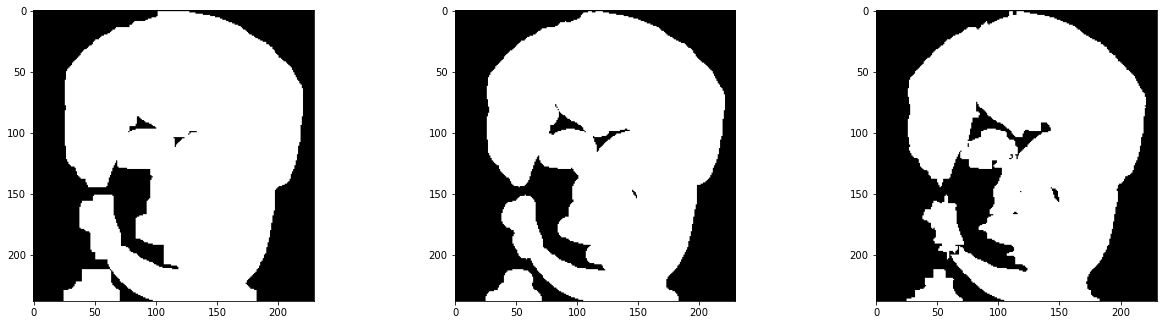

In [6]:
plt.figure(2)
plt.subplots_adjust(top=3,bottom=0.3,left=0.10,right=2.7,hspace=0.25,wspace=0.5)

for x in range(3):
    sonrisaD=cv2.dilate(sonrisaUBI,kernels[x],iterations=1)
    plt.subplot(1,3,x+1),plt.imshow(sonrisaD,cmap=plt.cm.gray)

<p style="text-align: justify">Dependiendo de la forma del elemento estructurante, se observa que los contornos de la imagen (particularmente en la zona inferior izquierda) exhiben una forma rectangular, elíptica y en cruz, respectivamente. Se evidencia también que el último de estos elementos estructurantes no garantiza la fusión de las 2 regiones en la zona inferior izquierda de la cara, al verse una ligera separación entre estas. Esto se podría solucionar aumentando el tamaño del elemento estructurante.
Este método podría utilizarse para realizar el llenado de imágenes, aunque a costa de una pérdida de calidad y fidelidad del contorno original de la imagen.</p>

### Erosión:

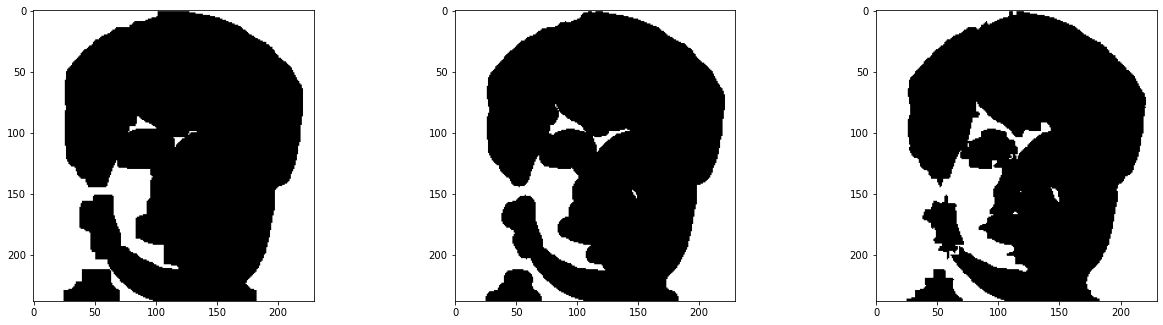

In [7]:
plt.figure(3)
plt.subplots_adjust(top=3,bottom=0.3,left=0.10,right=2.7,hspace=0.25,wspace=0.5)

for x in range(3):
    sonrisaD=cv2.erode(sonrisaUB,kernels[x],iterations=1)
    plt.subplot(1,3,x+1),plt.imshow(sonrisaD,cmap=plt.cm.gray)

<p style="text-align: justify">En el caso de la erosión se tienen resultados muy similares a la dilatación; sin embargo, en este caso se resalta como es de esperar el tono negro (al tomar como base la imagen binaria), manteniendo los bordes rectos o curvos, dependiendo del elemento estructurante, y distorsionando la calidad de la imagen. Nótese que el efecto de la erosión es idéntico dado que se está trabajando con el negativo de la imagen anterior: Se promueve el crecimiento de la región negra.</p>

<p style="text-align: justify">Ahora, para evaluar el desempeño de las operaciones de apertura y cierre, así como del filtro morfológico, se procede a añadir ruido del tipo sal y pimienta a la imagen original. Posteriormente, se evalúa el efecto de cada operación sobre la imagen al implementar kernels de distinto tamaño.</p>

In [8]:
# Adición de ruido a imagen
sonrisaN=rn(sonrisaUB, mode='s&p')
sonrisaN=np.array(255*sonrisaN, dtype='uint8')

s1=3
s2=7
s3=15

indexes=[s1,s2,s3]

k1=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(s1,s1))
k2=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(s2,s2))
k3=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(s3,s3))

kernels=[k1,k2,k3]

### Apertura:

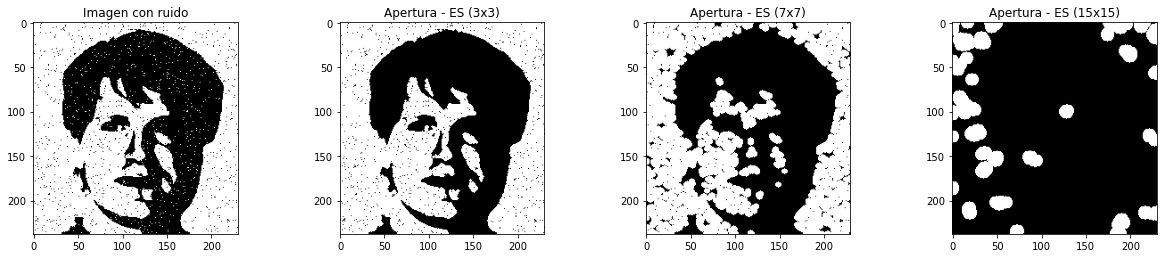

In [9]:
plt.figure(4)
plt.subplots_adjust(top=3,bottom=0.3,left=0.10,right=2.7,hspace=0.25,wspace=0.5)

plt.subplot(141),plt.imshow(sonrisaN,cmap=plt.cm.gray),plt.title("Imagen con ruido")

# Ciclo para aplicación de elementos estructurantes
for x in range(3):
    kernel=kernels[x]
    sonrisaAP=cv2.morphologyEx(sonrisaN,cv2.MORPH_OPEN, kernel)
    plt.subplot(1,4,x+2),plt.imshow(sonrisaAP,cmap=plt.cm.gray),plt.title("Apertura - ES ("+str(indexes[x])+"x"+str(indexes[x])+")")

<p style="text-align:justify">Dado que la apertura consiste de una erosión seguida de una dilatación, es entendible la razón por la cual se remueve el ruido tipo sal: Durante la erosión, se emplean elementos estructurantes de tamaño mayor al de los píxeles que conforman este ruido. Naturalmente, la dilatación posterior se emplea con el fin de recuperar, dentro de lo posible, las dimensiones originales de la imagen.<br>
Si se estudian los resultados de aplicar elementos estructurantes más grandes, se observa que la imagen no corresponde del todo con la original, debido al efecto exacerbado de la fusión de zonas negras durante la erosión. Por esta misma razón, en la imagen de la derecha se observa que los núcleos blancos tienden a concentrarse en la periferia: Son las únicas zonas en donde el efecto excesivo de la erosión no alcanza a eliminar las regiones blancas en su totalidad.</p>

### Cierre:

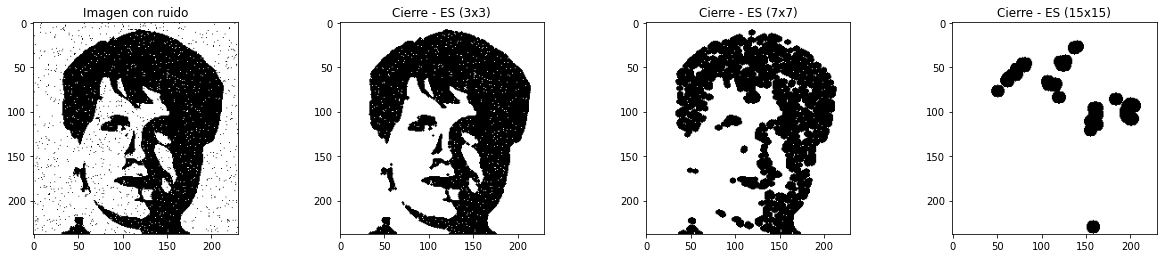

In [10]:
plt.figure(4)
plt.subplots_adjust(top=3,bottom=0.3,left=0.10,right=2.7,hspace=0.25,wspace=0.5)

plt.subplot(141),plt.imshow(sonrisaN, cmap=plt.cm.gray),plt.title("Imagen con ruido")

# Ciclo para aplicación de elementos estructurantes
for x in range(3):
    sonrisaCL=cv2.morphologyEx(sonrisaN,cv2.MORPH_CLOSE,kernels[x])
    plt.subplot(1,4,x+2),plt.imshow(sonrisaCL,cmap=plt.cm.gray),plt.title("Cierre - ES ("+str(indexes[x])+"x"+str(indexes[x])+")")

<p style="text-align:justify">Para esta operación de cierre, se observa una anulación del ruido tipo pimienta. Lo anterior sucede debido al mismo argumento expuesto previamente: En este caso, el efecto aumentado de la dilatación genera una preferencia por la fusión de las zonas blancas. Al erosionar la imagen resultante, se regeneran algunos núcleos negros a partir de las pocas zonas negras que quedaron luego de la dilatación. Por tal motivo, en este caso los núcleos negros se concentran en la zona en donde se encuentra el cabello en la imagen original.</p>

### Filtro morfológico:

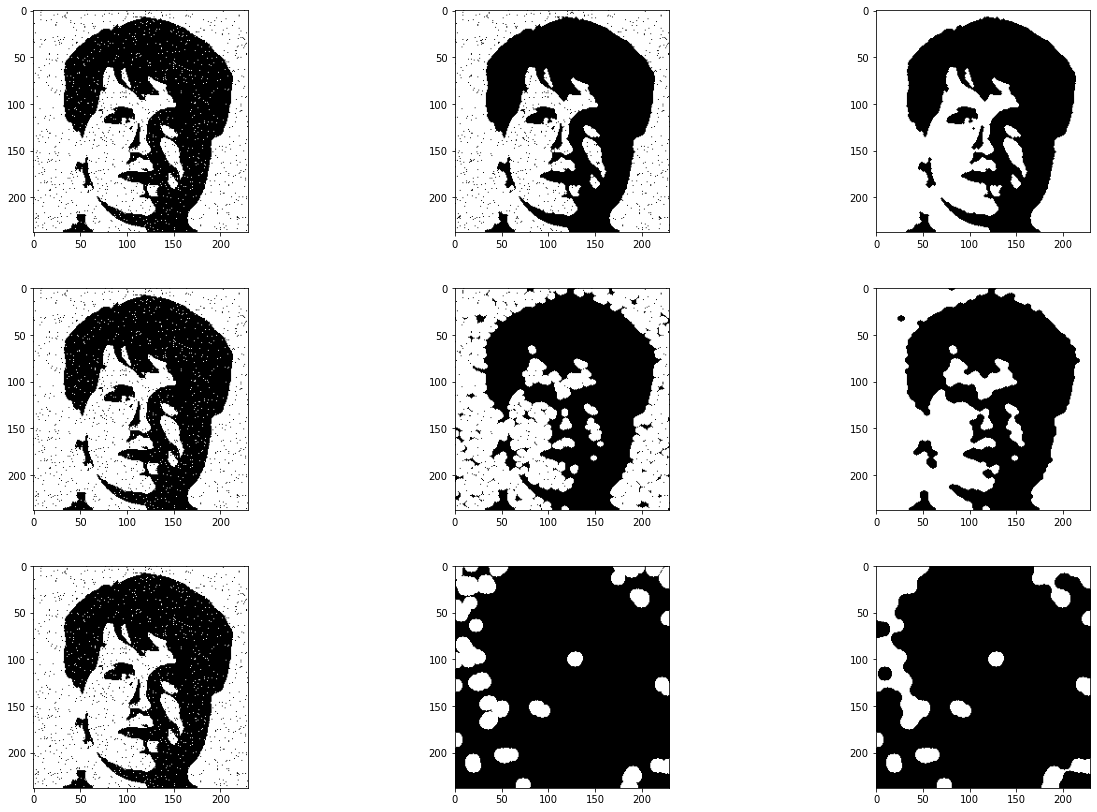

In [11]:
plt.figure(4)
plt.subplots_adjust(top=3,bottom=0.3,left=0.10,right=2.7,hspace=0.25,wspace=0.5)

# Ciclo para aplicación de kernels
for x in range(3):
    # Apertura
    sonrisaAP=cv2.morphologyEx(sonrisaN, cv2.MORPH_OPEN, kernels[x])

    # Cierre sobre nueva imagen
    sonrisaFM=cv2.morphologyEx(sonrisaAP,cv2.MORPH_CLOSE, kernels[x])

    plt.subplot(3,3,3*x+1),plt.imshow(sonrisaN,cmap=plt.cm.gray)
    plt.subplot(3,3,3*x+2),plt.imshow(sonrisaAP,cmap=plt.cm.gray)
    plt.subplot(3,3,3*x+3),plt.imshow(sonrisaFM,cmap=plt.cm.gray)

<p style="text-align:justify">El filtro morfológico permite observar la combinación entre la apertura y el cierre de la imagen, por lo que posee las características de ambas. En el caso de elementos estructurantes pequeños, se puede observar una buena limpieza del ruido tanto en las zonas blancas como negras. Mientras que para elementos estructurantes grandes se evidencia una pérdida total de la calidad de la imagen. Con el fin de eliminar de manera efectiva la totalidad del ruido, es importante asegurar que el elemento estructurante sea de mayor tamaño al de los grupos de píxeles que generan el ruido. Nótese que, en este caso, tanto la dilatación como la erosión exhiben un efecto exagerado, la primera durante el cierre y la segunda durante la apertura. Lo anterior mitiga parcialmente los efectos de distorsión sobre la imagen original, lo cual es evidente al observar los resultados de aplicar elementos estructurantes de dimensiones 7x7 y 15x15.</p>

### Gradiente morfológico:

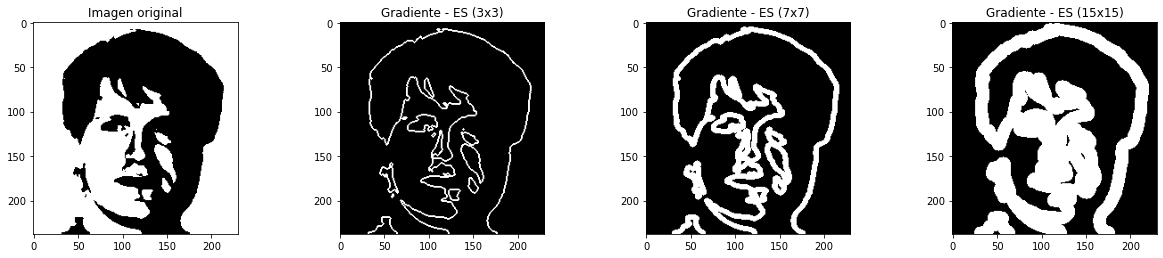

In [12]:
plt.figure(4)
plt.subplots_adjust(top=3,bottom=0.3,left=0.10,right=2.7,hspace=0.25,wspace=0.5)

plt.subplot(141),plt.imshow(sonrisaUB, cmap=plt.cm.gray),plt.title("Imagen original")

# Ciclo para aplicación de elementos estructurantes
for x in range(3):
    kernel=kernels[x]
    sonrisaGM=cv2.morphologyEx(sonrisaUB,cv2.MORPH_GRADIENT,kernel)
    plt.subplot(1,4,x+2),plt.imshow(sonrisaGM,cmap=plt.cm.gray),plt.title("Gradiente - ES ("+str(indexes[x])+"x"+str(indexes[x])+")")

<p style="text-align:justify">Dado que esta operación es el resultado de la diferencia entre la dilatación y la erosión de la imagen, es comprensible esperar contornos más burdos al emplear elementos estructurantes más grandes, pues esto implica que los efectos de cada operación serán más grandes. A comparación de otras operaciones para la identificación de contornos, como los filtros de Sobel y Canny, se podría afirmar que el gradiente morfológico permite encontrar bordes en un mayor número de direcciones a comparación del filtro de Sobel o el mismo filtro de Prewitt sin la necesidad de definir kernels para cada dirección. No obstante, su acción se limita a imágenes binarias, lo cual supone una desventaja importante respecto a los filtros.</p>

### Top-Hat:

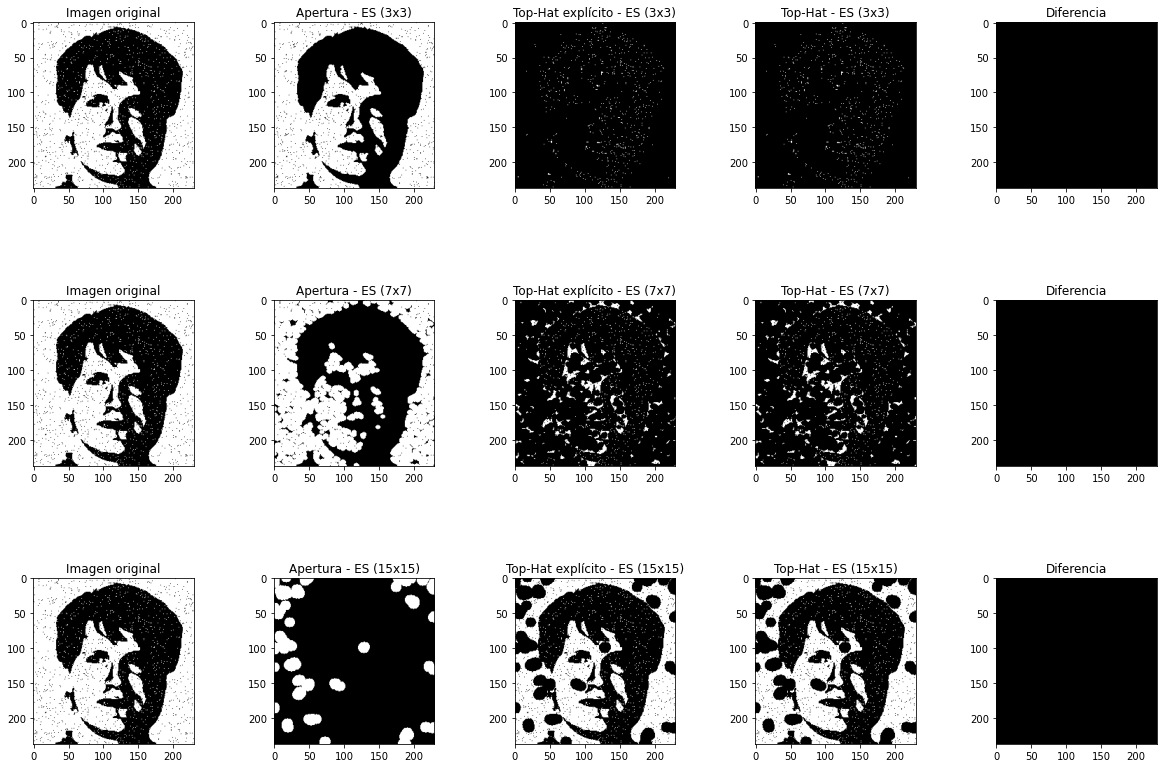

In [104]:
plt.figure(4)
plt.subplots_adjust(top=3,bottom=0.3,left=0.10,right=2.7,hspace=0.25,wspace=0.5)

# Ciclo para aplicación de elementos estructurantes
for x in range(3):
    kernel=kernels[x]
    sonrisaAP=cv2.morphologyEx(sonrisaN,cv2.MORPH_OPEN,kernel)
    sonrisaTH=cv2.morphologyEx(sonrisaN,cv2.MORPH_TOPHAT,kernel)
    sonrisaTHE=sonrisaN-sonrisaAP
    
    plt.subplot(3,5,5*x+1),plt.imshow(sonrisaN, cmap=plt.cm.gray),plt.title("Imagen original")
    plt.subplot(3,5,5*x+2),plt.imshow(sonrisaAP,cmap=plt.cm.gray),plt.title("Apertura - ES ("+str(indexes[x])+"x"+str(indexes[x])+")")
    plt.subplot(3,5,5*x+3),plt.imshow(sonrisaTHE,cmap=plt.cm.gray),plt.title("Top-Hat explícito - ES ("+str(indexes[x])+"x"+str(indexes[x])+")")
    plt.subplot(3,5,5*x+4),plt.imshow(sonrisaTH,cmap=plt.cm.gray),plt.title("Top-Hat - ES ("+str(indexes[x])+"x"+str(indexes[x])+")")
    plt.subplot(3,5,5*x+5),plt.imshow(sonrisaTHE-sonrisaTH,cmap=plt.cm.gray),plt.title("Diferencia")

<p style="text-align:justify">Esta operación es el resultado de restarle a la imagen original su respectiva apertura a través de un elemento estructurante dado. Se observa que entre más grande sea el elemento estructurante, la operación Top-Hat genera un imagen que difiere cada vez menos de la original. Esto se debe a que el efecto de erosión de la apertura es cada vez más exagerado, por lo que una mayor parte de la imagen resultante de la apertura será negra.<br>
En general, esta técnica es utilizada para permitir un proceso de segmentación más efectivo, particularmente en imágenes con mala iluminación. Este efecto se evidencia más claramente en la siguiente imagen.</p>

(<matplotlib.axes._subplots.AxesSubplot at 0x2c37fc68b20>,
 Text(0.5, 1.0, 'Umbralización binaria'))

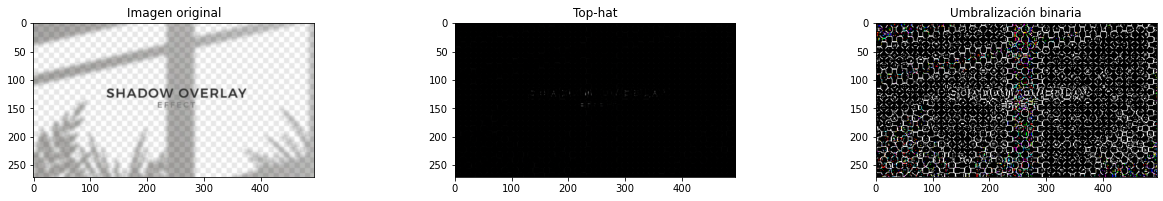

In [100]:
dd=cv2.imread("Figs/window.png")
gg=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(s1,s1))
ddth=cv2.morphologyEx(dd,cv2.MORPH_TOPHAT,gg)
ret,ddb=cv2.threshold(ddth,0,255,cv2.THRESH_BINARY)

plt.figure()
plt.subplots_adjust(top=3,bottom=0.3,left=0.10,right=2.7,hspace=0.25,wspace=0.5)

plt.subplot(131),plt.imshow(dd),plt.title("Imagen original")
plt.subplot(132),plt.imshow(ddth),plt.title("Top-hat")
plt.subplot(133),plt.imshow(ddb),plt.title("Umbralización binaria")

### Black-Hat:

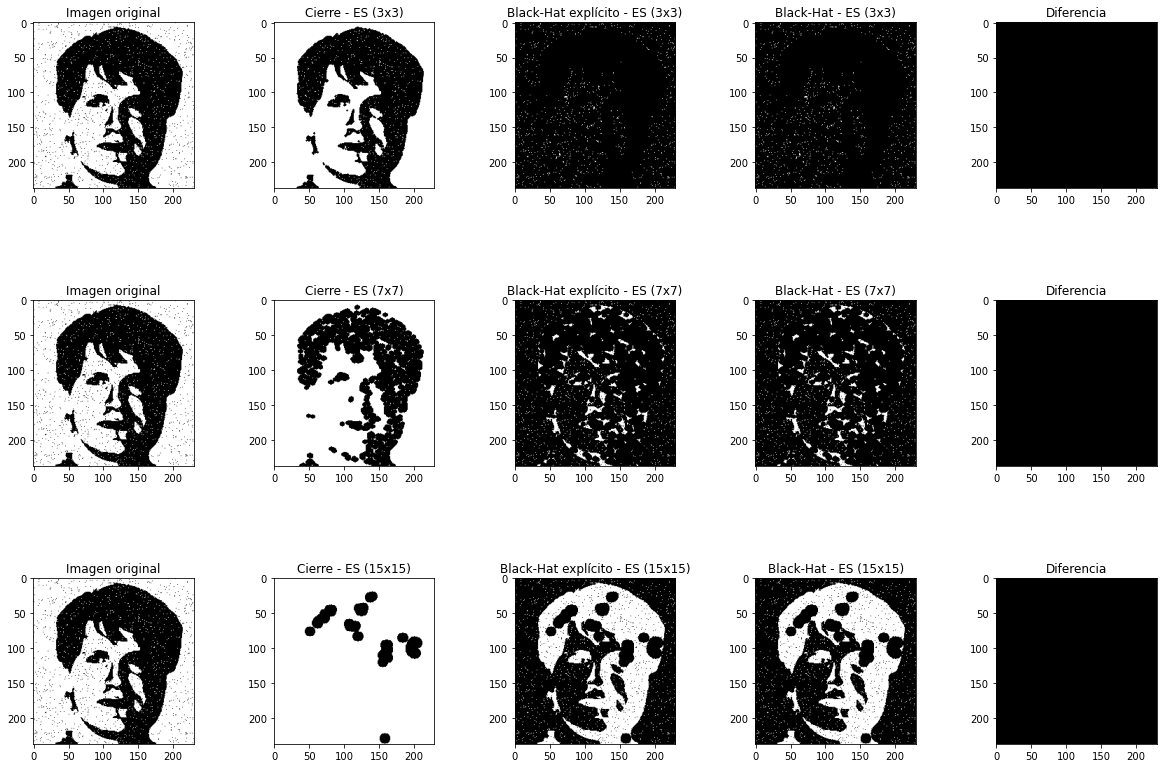

In [54]:
plt.figure(4)
plt.subplots_adjust(top=3,bottom=0.3,left=0.10,right=2.7,hspace=0.25,wspace=0.5)

# Ciclo para aplicación de elementos estructurantes
for x in range(3):
    kernel=kernels[x]
    sonrisaCL=cv2.morphologyEx(sonrisaN,cv2.MORPH_CLOSE,kernel)
    sonrisaBH=cv2.morphologyEx(sonrisaN,cv2.MORPH_BLACKHAT,kernel)
    sonrisaBHE=sonrisaCL-sonrisaN
    
    plt.subplot(3,5,5*x+1),plt.imshow(sonrisaN, cmap=plt.cm.gray),plt.title("Imagen original")
    plt.subplot(3,5,5*x+2),plt.imshow(sonrisaCL,cmap=plt.cm.gray),plt.title("Cierre - ES ("+str(indexes[x])+"x"+str(indexes[x])+")")
    plt.subplot(3,5,5*x+3),plt.imshow(sonrisaBHE,cmap=plt.cm.gray),plt.title("Black-Hat explícito - ES ("+str(indexes[x])+"x"+str(indexes[x])+")")
    plt.subplot(3,5,5*x+4),plt.imshow(sonrisaBH,cmap=plt.cm.gray),plt.title("Black-Hat - ES ("+str(indexes[x])+"x"+str(indexes[x])+")")
    plt.subplot(3,5,5*x+5),plt.imshow(sonrisaBHE-sonrisaBH,cmap=plt.cm.gray),plt.title("Diferencia")

(<matplotlib.axes._subplots.AxesSubplot at 0x2c3048e2af0>,
 Text(0.5, 1.0, 'Umbralización binaria'))

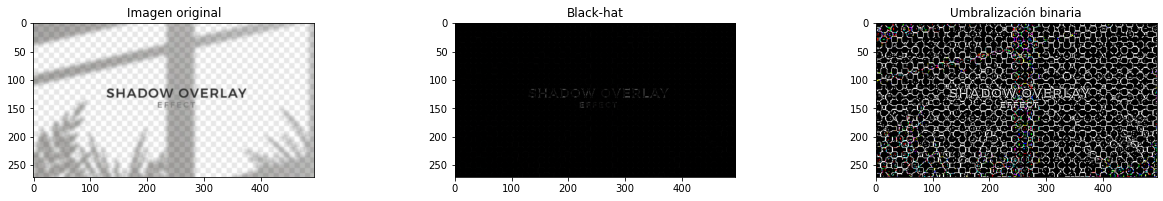

In [117]:
dd=cv2.imread("Figs/window.png")
gg=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(s1,s1))
ddth=cv2.morphologyEx(dd,cv2.MORPH_BLACKHAT,gg)
ret,ddb=cv2.threshold(ddth,0,255,cv2.THRESH_BINARY)

plt.figure()
plt.subplots_adjust(top=3,bottom=0.3,left=0.10,right=2.7,hspace=0.25,wspace=0.5)

plt.subplot(131),plt.imshow(dd),plt.title("Imagen original")
plt.subplot(132),plt.imshow(ddth),plt.title("Black-hat")
plt.subplot(133),plt.imshow(ddb),plt.title("Umbralización binaria")

<p style="text-align:justify">Esta operación consiste en la diferencia entre el cierre de una imagen y la imagen original. Para la imagen del rostro, se observa que elementos estructurantes de mayor tamaño generan como resultado una imagen cada vez más cercana al negativo de la imagen original, lo cual es de esperar dado que el efecto de la dilatación en el cierre es más notorio entre más grande sea el elemento estructurante: Habrán zonas blancas progresivamente más grandes.<br>
El efecto de segmentación es más evidente, no obstante, en la segunda imagen, en donde, a pesar de las sombras presentes, la aplicación del Black-Hat permite obtener una segmentación bastante confiable de la imagen después de la umbralización.</p>

### Transformada Hit or Miss:

(<matplotlib.image.AxesImage at 0x2c3634f1760>,
 Text(0.5, 1.0, 'Elemento estructurante'))

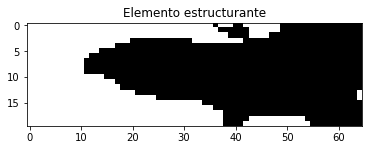

In [15]:
lips=sonrisaUB[170:190,80:145]

plt.imshow(lips,cmap=plt.cm.gray),plt.title('Elemento estructurante')

(<matplotlib.axes._subplots.AxesSubplot at 0x2c363dc4850>,
 <matplotlib.image.AxesImage at 0x2c3635a4f70>)

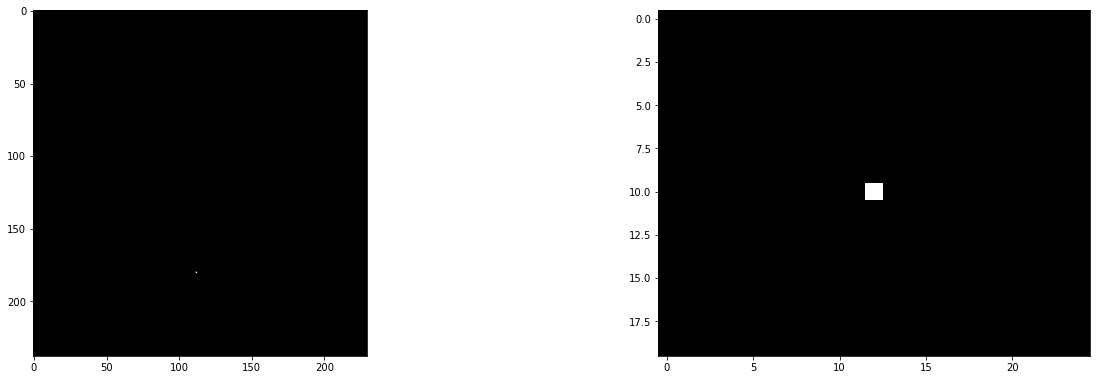

In [16]:
# Resultado para elemento estructurante "lips"
sonrisaHM=ndi.binary_hit_or_miss(sonrisaUB,lips)
#sonrisaHM=cv2.morphologyEx(sonrisaUB,cv2.MORPH_HITMISS,lips)

plt.figure()
plt.subplots_adjust(top=3,bottom=0.3,left=0.10,right=2.7,hspace=0.25,wspace=0.5)

plt.subplot(221),plt.imshow(sonrisaHM,cmap=plt.cm.gray)
plt.subplot(222),plt.imshow(sonrisaHM[170:190,100:125],cmap=plt.cm.gray)

<p style="text-align:justify">Para este primer ejemplo, se tomó como elemento estructurante la región de la imagen original correspondiente a los labios. Posteriormente, se aplicó la función binary_hit_or_miss de la librería ndimage. Como se esperaba, la transformada encontró un único píxel sobre el cual, al ubicar el elemento estructurante, había coincidencia con la imagen original.</p>

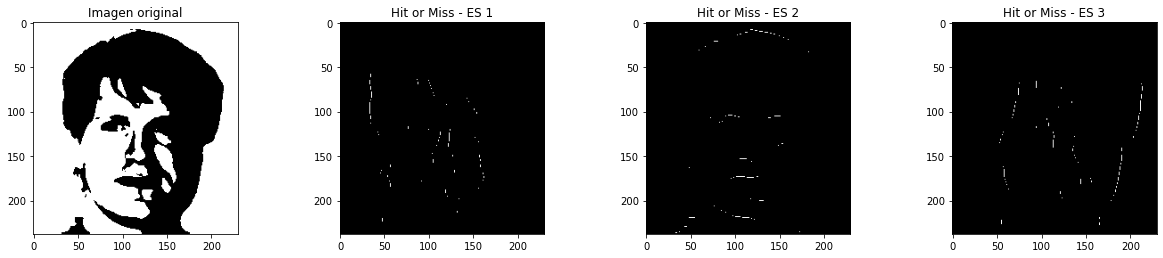

In [53]:
# Elementos estructurantes
es1=np.array([[1,0,0],[1,0,0],[1,0,0]])
es2=np.array([[1,1,1],[0,0,0],[0,0,0]])
es3=np.array([[0,0,1],[0,0,1],[0,0,1]])

elems=[es1,es2,es3]

plt.figure(4)
plt.subplots_adjust(top=3,bottom=0.3,left=0.10,right=2.7,hspace=0.25,wspace=0.5)

plt.subplot(141),plt.imshow(sonrisaUB, cmap=plt.cm.gray),plt.title("Imagen original")

# Ciclo para aplicación de kernels
for x in range(3):
    sonrisaHM=ndi.binary_hit_or_miss(sonrisaUB,elems[x])
    plt.subplot(1,4,x+2),plt.imshow(sonrisaHM,cmap=plt.cm.gray),plt.title("Hit or Miss - ES "+str(x+1))

<p style="text-align:justify">En este segundo caso, se diseñaron 3 elementos estructurantes de dimensiones 3x3. El primero de ellos contenía su primera columna compuesta de unos, el segundo poseía su primera fila de este estilo, mientras que el último de ellos tenía su tercera columna conformada por unos. El efecto de cada uno de ellos podría asemejarse, de groso modo, a la detección de bordes desde la izquierda, arriba y la derecha de la imagen, respectivamente. Lo anterior se puede observar en las imágenes 2 a 4 obtenidas luego de aplicar la transformada.</p>

### Adelgazamiento:

(<matplotlib.axes._subplots.AxesSubplot at 0x2c3028b9b50>,
 Text(0.5, 1.0, 'Adelgazamiento total'))

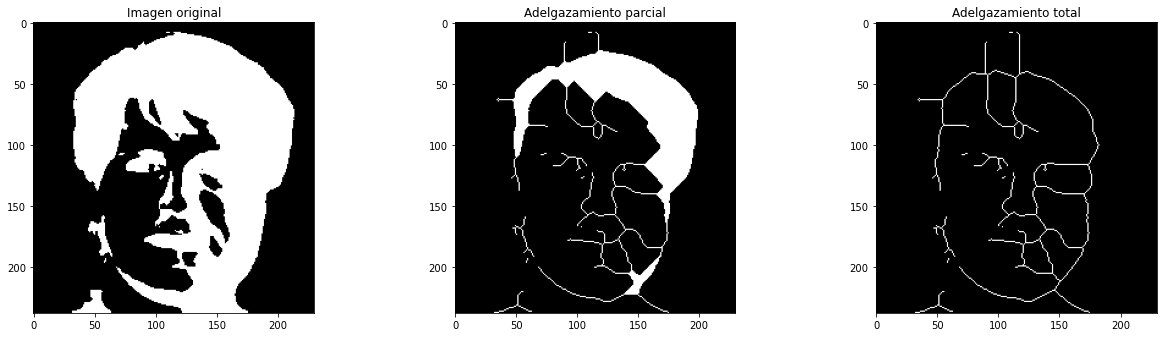

In [108]:
sonrisaADP=morph.thin(sonrisaUBI,max_iter=15)
sonrisaAD=morph.thin(sonrisaUBI)

plt.figure()
plt.subplots_adjust(top=3,bottom=0.3,left=0.10,right=2.7,hspace=0.25,wspace=0.5)

plt.subplot(131),plt.imshow(sonrisaUBI,cmap=plt.cm.gray),plt.title("Imagen original")
plt.subplot(132),plt.imshow(sonrisaADP,cmap=plt.cm.gray),plt.title("Adelgazamiento parcial")
plt.subplot(133),plt.imshow(sonrisaAD,cmap=plt.cm.gray),plt.title("Adelgazamiento total")

<p style="text-align:justify">La técnica de adelagazamiento, según los resultados obtenidos, podría implementarse para la obtención de determinados contornos en la imagen, así como para la compresión de la misma. Esta última aplicación (adelgazamiento total) se conoce como esqueletonización, y su principal característica es que permite recuperar la imagen original.</p>

### Esqueleto:

(<matplotlib.axes._subplots.AxesSubplot at 0x2c303ffc400>,
 Text(0.5, 1.0, 'Esqueleto'))

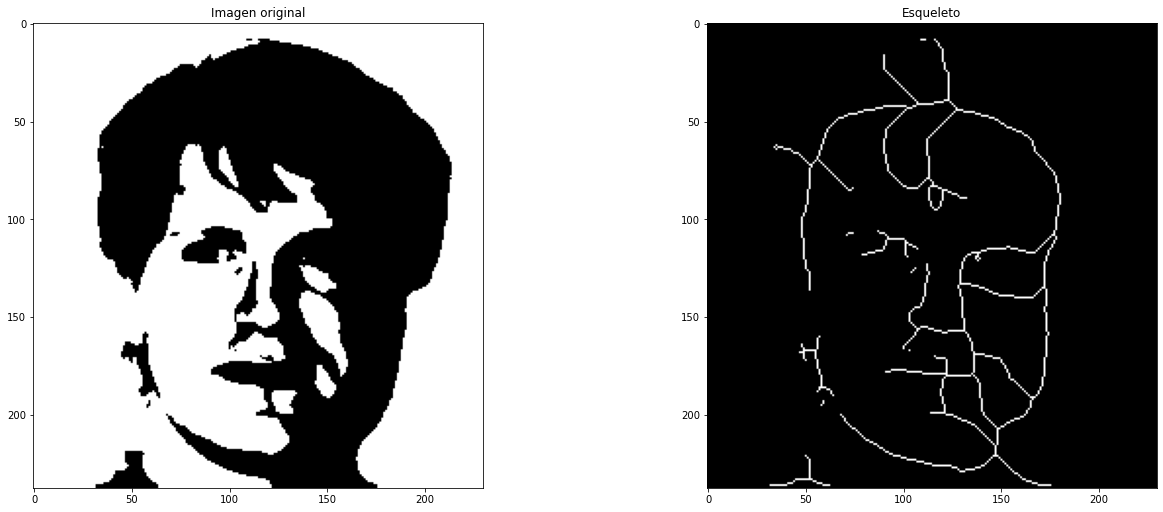

In [112]:
sonrisaES=morph.skeletonize(sonrisaUB==0)

plt.figure()
plt.subplots_adjust(top=3,bottom=0.3,left=0.10,right=2.7,hspace=0.25,wspace=0.5)

plt.subplot(121),plt.imshow(sonrisaUB,cmap=plt.cm.gray),plt.title("Imagen original")
plt.subplot(122),plt.imshow(sonrisaES,cmap=plt.cm.gray),plt.title("Esqueleto")

<h1 style="font-size:200%; text-align:center">Imagen a color</h1>

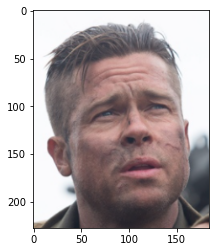

In [43]:
fury=cv2.imread("Figs/fury.png")
fury=cv2.cvtColor(fury,cv2.COLOR_BGR2RGB)

plt.imshow(fury)

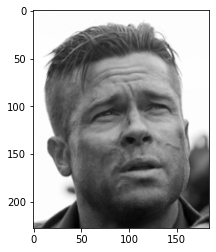

In [44]:
furyHSI=cv2.cvtColor(fury,cv2.COLOR_RGB2HLS) # Conversión a formato HSI

h,l,s=cv2.split(furyHSI)

plt.imshow(l,cmap=plt.cm.gray)

(<matplotlib.axes._subplots.AxesSubplot at 0x2c3664aabb0>,
 Text(0.5, 1.0, 'Imagen original'))

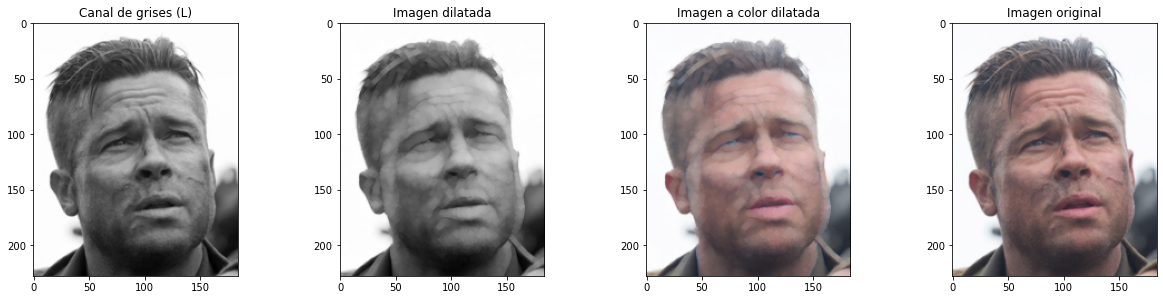

In [45]:
selem=morph.disk(2)

# Dilatación
dilated=morph.dilation(l,selem)

# Mezcla de canales y reconversión a RGB
hsidi=cv2.merge((h,dilated,s))
rgbdi=cv2.cvtColor(hsidi,cv2.COLOR_HLS2RGB)

plt.figure()
plt.subplots_adjust(top=3,bottom=0.3,left=0.10,right=2.7,hspace=0.25,wspace=0.5)

plt.subplot(141),plt.imshow(l,cmap=plt.cm.gray),plt.title("Canal de grises (L)")
plt.subplot(142),plt.imshow(dilated,cmap=plt.cm.gray),plt.title("Imagen dilatada")
plt.subplot(143),plt.imshow(rgbdi,cmap=plt.cm.gray),plt.title("Imagen a color dilatada")
plt.subplot(144),plt.imshow(fury,cmap=plt.cm.gray),plt.title("Imagen original")

<p style="text-align:justify">Se observa que la operación de dilatación resalta los atributos con colores claros, mientras que parece comprimir aquellos con colores oscuros (cabello, interior de la boca, sombras).</p>

(<matplotlib.axes._subplots.AxesSubplot at 0x2c3665cd190>,
 Text(0.5, 1.0, 'Imagen original'))

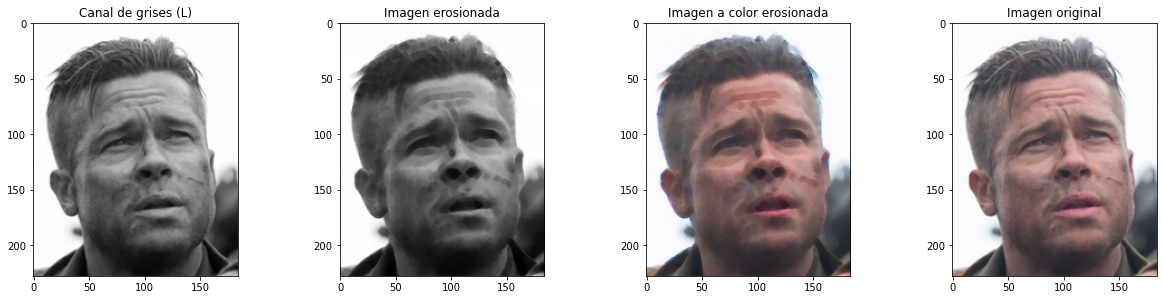

In [46]:
# Erosión
eroded=morph.erosion(l,selem)

# Mezcla de canales y reconversión a RGB
hsier=cv2.merge((h,eroded,s))
rgber=cv2.cvtColor(hsier,cv2.COLOR_HLS2RGB)

plt.figure()
plt.subplots_adjust(top=3,bottom=0.3,left=0.10,right=2.7,hspace=0.25,wspace=0.5)

plt.subplot(141),plt.imshow(l,cmap=plt.cm.gray),plt.title("Canal de grises (L)")
plt.subplot(142),plt.imshow(eroded,cmap=plt.cm.gray),plt.title("Imagen erosionada")
plt.subplot(143),plt.imshow(rgber,cmap=plt.cm.gray),plt.title("Imagen a color erosionada")
plt.subplot(144),plt.imshow(fury,cmap=plt.cm.gray),plt.title("Imagen original")

<p style="text-align:justify">En el caso de la erosión, se observa un resaltado de las características de color oscuro, mientras se evidencia una compresión de aquellas con intensidades claras (frente, iris, orejas, fondo).</p>

(<matplotlib.axes._subplots.AxesSubplot at 0x2c36f6862e0>,
 Text(0.5, 1.0, 'Imagen original'))

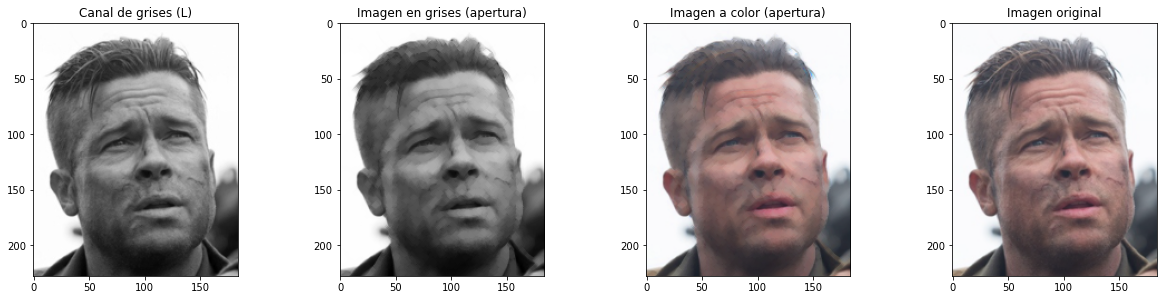

In [55]:
# Apertura
opened=morph.opening(l,selem)

# Mezcla de canales y reconversión a RGB
hsiop=cv2.merge((h,opened,s))
rgbop=cv2.cvtColor(hsiop,cv2.COLOR_HLS2RGB)

plt.figure()
plt.subplots_adjust(top=3,bottom=0.3,left=0.10,right=2.7,hspace=0.25,wspace=0.5)

plt.subplot(141),plt.imshow(l,cmap=plt.cm.gray),plt.title("Canal de grises (L)")
plt.subplot(142),plt.imshow(opened,cmap=plt.cm.gray),plt.title("Imagen en grises (apertura)")
plt.subplot(143),plt.imshow(rgbop,cmap=plt.cm.gray),plt.title("Imagen a color (apertura)")
plt.subplot(144),plt.imshow(fury,cmap=plt.cm.gray),plt.title("Imagen original")

(<matplotlib.axes._subplots.AxesSubplot at 0x2c36f25a370>,
 Text(0.5, 1.0, 'Imagen original'))

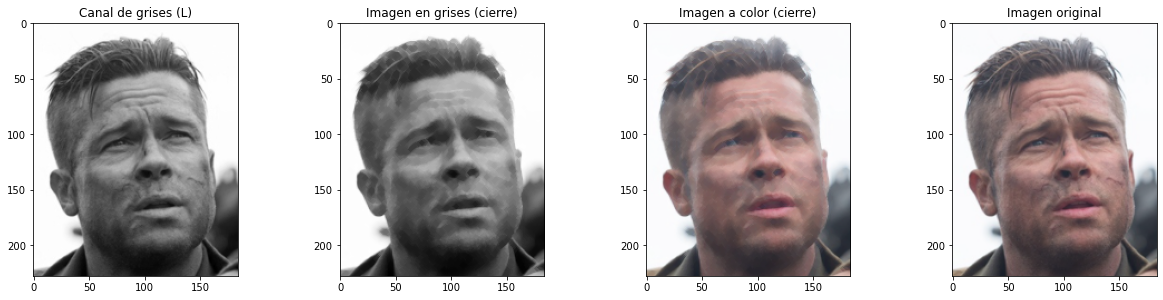

In [56]:
# Cierre
closed=morph.closing(l,selem)

# Mezcla de canales y reconversión a RGB
hsicl=cv2.merge((h,closed,s))
rgbcl=cv2.cvtColor(hsicl,cv2.COLOR_HLS2RGB)

plt.figure()
plt.subplots_adjust(top=3,bottom=0.3,left=0.10,right=2.7,hspace=0.25,wspace=0.5)

plt.subplot(141),plt.imshow(l,cmap=plt.cm.gray),plt.title("Canal de grises (L)")
plt.subplot(142),plt.imshow(closed,cmap=plt.cm.gray),plt.title("Imagen en grises (cierre)")
plt.subplot(143),plt.imshow(rgbcl,cmap=plt.cm.gray),plt.title("Imagen a color (cierre)")
plt.subplot(144),plt.imshow(fury,cmap=plt.cm.gray),plt.title("Imagen original")

(<matplotlib.axes._subplots.AxesSubplot at 0x2c36bf37fd0>,
 Text(0.5, 1.0, 'Imagen original'))

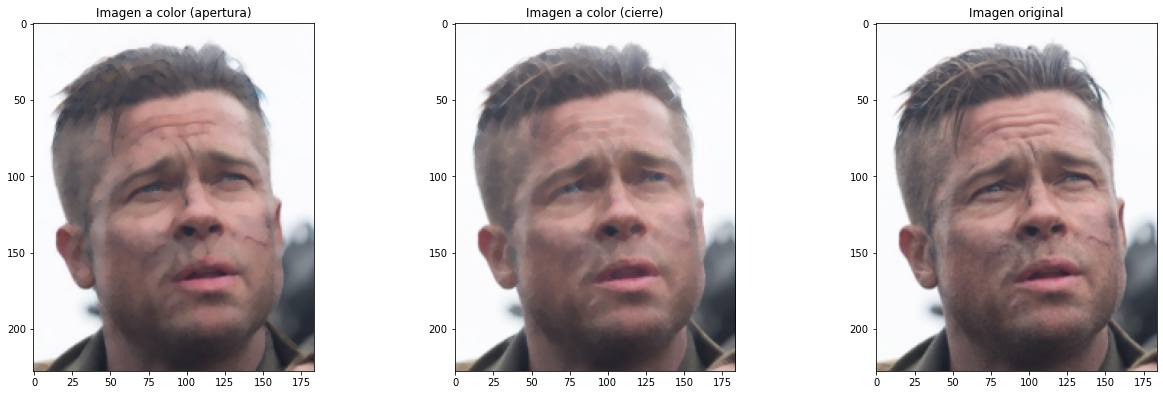

In [49]:
plt.figure()
plt.subplots_adjust(top=3,bottom=0.3,left=0.10,right=2.7,hspace=0.25,wspace=0.5)

plt.subplot(131),plt.imshow(rgbop,cmap=plt.cm.gray),plt.title("Imagen a color (apertura)")
plt.subplot(132),plt.imshow(rgbcl,cmap=plt.cm.gray),plt.title("Imagen a color (cierre)")
plt.subplot(133),plt.imshow(fury,cmap=plt.cm.gray),plt.title("Imagen original")

<p style="text-align:justify">A partir de los resultados de las operacione sde apertura y cierre, se evidencia que, para la primera operación, el efecto de la erosión es el más evidente en la imagen final (resaltan los píxeles de baja intensidad). En el caso del cierre, las zonas claras se observan con mayor prevalencia.</p>